# Sentiment Analysis Model on Amazon Customer reviews

### Importing required libraries and reading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib
import eli5

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

C:\Users\CHANDRU\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\CHANDRU\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
C:\Users\CHANDRU\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1ty

In [2]:
data=pd.read_csv('ScrapedReviews.csv')

In [3]:
data.head()

,reviews
0,"\n\n Brought this phone for my wife who is die hard fan for oppo...Offer like 2000 extra off on exchange with Oppo is just like waww....So after exchange of her old oppo mobile I got this phone for just Rs.6800.... Best phone if u want oppo brand name and u are boared to ur old oppo phone... So this review is considering 6800 cost...Pros.1) good features considering cost 6800.2) Size matters 6.5 inch grt3) Speakers are good Dolby4) Comes with classic headphones with good looks and decent sound quality... No other phones now a days comes with headphones...5) Quad camera gives good quality photos...6) Selfie camera is also decent considering cost 68007) 5000mAh battery8) can be use as power bank for other phonesCons:1) Original cost 13990 is huge considering features...Other good brands like MI, VIVO, MOTO, etc sells 48MP camera phones for 12000 and so...2) Accessories like back cover, tempered glass are yet not in market... May be u have to wait for them...Though 1 transparent back cover is included in Mobile Box...This is all about this phone after 24hrs use....I will update if something comes...\n\n"
1,"\n\n Best option for exchange, I got it in 9k ,Review score (out of 5)Design : 4.5 (finger print scanner position is bit high), other things like screen size, corners,back panel, camera position are perfect and it's light weight too...Sounds quality : 5/5 (unexpected, dual side stereo and Dolby is awesome, loudness, clarity and effects are far better then any other phone i.e. mi 7 pro, Lenovo, Samsung or honor)Photography : it's similar to other available options in market, day light as usual is very clear and crisp, didn't get time for more night photography, but few repetitive uploaded pics are in night mode with very minimal light which are good.Battery backup : best in this category (10% ~ 3 hours of heavy uses) , for heavy uses 30hours for normal uses it ll go up to 2 days.Performance : not played many games but seems good, while opening any game auto memory cleaner will run,lag and heat issue is not there (checked continuously 1.5 hours)Memory space : 46 GB free space, all basic apps are pre installed, separate as card slot is available (apart from 2 SIM slot), 1.86 GB ram available after all updation, while playing any game also 900 to 1 GB space is availablePros : apart from above mentioned points :1)Front cam is good like other similar phone (mi, real me, honor, Samsung)2) earphones quality/look is very good in this range.3) dual speaker position is in front top of display and near to charging pin, so stereo comes properly4)face detection is fast5)no heating issue while charging /YouTube /gaming6) battery is lasting for more than 4 days on normal usesCons:1) fingerprint scanner position is bit high2) ram 6 GB would have a perfect option3) macro photos are not that good compare to redmi 7 pro4) no fast charger with pack\n\n"
2,\n\n Good Phone With Exchange\n\n
3,\n\n Oppo makes very nice phone at this price range about quad cameras but we have another option to select Realme smartphones which is comparatively low budget and good cameras...But this phone I like mostly in battery back up with type C charger.. and also like camera clearity because I have already attached some snaps here from my Oppo A5 2020...Overall good performance of this phone and speaker was nice sounds which is have dual atmos..Thanks Oppo\n\n
4,\n\n Lowest speed ever seen in android and charger not support to battery. It will be 3 hours to take full charge\n\n


In [4]:
df=data.copy() # Creating a copy of the original data

In [5]:
data.shape # dataset contains 8000 reviews

(8000, 1)

### Data Cleaning and Preparation

##### Each review with more than 100 words was imported and tokenized. Afterward, all of the tokens that were punctuations, label, stopword, or not an English word (emoji, special character, foreign languages) were removed.

###### Following are the process followed:
* Lowercasing
* Tokenization
* Stemming and Lemmatization
* Removing Stopwords
* Removing Punctuations
* Removing Digits


In [6]:
df['reviews']=df['reviews'].apply(lambda x:x.strip('\n')) # To remove '\n' from every review

In [7]:
df.head()

,reviews
0,"Brought this phone for my wife who is die hard fan for oppo...Offer like 2000 extra off on exchange with Oppo is just like waww....So after exchange of her old oppo mobile I got this phone for just Rs.6800.... Best phone if u want oppo brand name and u are boared to ur old oppo phone... So this review is considering 6800 cost...Pros.1) good features considering cost 6800.2) Size matters 6.5 inch grt3) Speakers are good Dolby4) Comes with classic headphones with good looks and decent sound quality... No other phones now a days comes with headphones...5) Quad camera gives good quality photos...6) Selfie camera is also decent considering cost 68007) 5000mAh battery8) can be use as power bank for other phonesCons:1) Original cost 13990 is huge considering features...Other good brands like MI, VIVO, MOTO, etc sells 48MP camera phones for 12000 and so...2) Accessories like back cover, tempered glass are yet not in market... May be u have to wait for them...Though 1 transparent back cover is included in Mobile Box...This is all about this phone after 24hrs use....I will update if something comes..."
1,"Best option for exchange, I got it in 9k ,Review score (out of 5)Design : 4.5 (finger print scanner position is bit high), other things like screen size, corners,back panel, camera position are perfect and it's light weight too...Sounds quality : 5/5 (unexpected, dual side stereo and Dolby is awesome, loudness, clarity and effects are far better then any other phone i.e. mi 7 pro, Lenovo, Samsung or honor)Photography : it's similar to other available options in market, day light as usual is very clear and crisp, didn't get time for more night photography, but few repetitive uploaded pics are in night mode with very minimal light which are good.Battery backup : best in this category (10% ~ 3 hours of heavy uses) , for heavy uses 30hours for normal uses it ll go up to 2 days.Performance : not played many games but seems good, while opening any game auto memory cleaner will run,lag and heat issue is not there (checked continuously 1.5 hours)Memory space : 46 GB free space, all basic apps are pre installed, separate as card slot is available (apart from 2 SIM slot), 1.86 GB ram available after all updation, while playing any game also 900 to 1 GB space is availablePros : apart from above mentioned points :1)Front cam is good like other similar phone (mi, real me, honor, Samsung)2) earphones quality/look is very good in this range.3) dual speaker position is in front top of display and near to charging pin, so stereo comes properly4)face detection is fast5)no heating issue while charging /YouTube /gaming6) battery is lasting for more than 4 days on normal usesCons:1) fingerprint scanner position is bit high2) ram 6 GB would have a perfect option3) macro photos are not that good compare to redmi 7 pro4) no fast charger with pack"
2,Good Phone With Exchange
3,Oppo makes very nice phone at this price range about quad cameras but we have another option to select Realme smartphones which is comparatively low budget and good cameras...But this phone I like mostly in battery back up with type C charger.. and also like camera clearity because I have already attached some snaps here from my Oppo A5 2020...Overall good performance of this phone and speaker was nice sounds which is have dual atmos..Thanks Oppo
4,Lowest speed ever seen in android and charger not support to battery. It will be 3 hours to take full charge


In [8]:
STOPWORDS=stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

In [9]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [10]:
def clean_text(text):
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned

In [11]:
df['cleaned_reviews']=df['reviews'].apply(lambda x:clean_text(x)) #adding a new column 'cleaned_reviews' and inserting cleaned reviews

In [12]:
df.sample(10)

,reviews,cleaned_reviews
4569,Battery charge issue ....it's too slowly nd I complains your customers care executive but not responded yet,batteri charg issu slowli nd complain custom care execut respond yet
6499,Everage phone in this price. It is good for children for oneline study purpose. This phone support allmost all Indian languages.,everag phone price good children onelin studi purpos phone support allmost indian languag
3517,"Not bad....can suggest this mbl for normal users.... charging speed is very much disappointed , taking lot of time to charge up ....basic charger type not even USB cable....this suits for parents only ....not for youngsters, gamers etc.",badcan suggest mbl normal user charg speed much disappoint take lot time charg basic charger type even usb cablethi suit parent youngster gamer etc
6894,Front camera is not good. When we take a selfie with front camera it looks like artificial effect on the pic & when you zoom it pic will start to blur.,front camera good take selfi front camera look like artifici effect pic zoom pic start blur
941,Very bad quality. Speaker and mic Very bad quality. Speaker and micVery bad quality. Speaker and micVery bad quality. Speaker and micVery bad quality. Speaker and micVery bad quality. Speaker and micVery bad quality. Speaker and mic,bad qualiti speaker mic bad qualiti speaker micveri bad qualiti speaker micveri bad qualiti speaker micveri bad qualiti speaker micveri bad qualiti speaker micveri bad qualiti speaker mic
3200,Product is all-over good but it will be helpful if seller provide the tax invoice or purchase bill in some hard printing material. It will be useful in future to us.,product allov good help seller provid tax invoic purchas bill hard print materi use futur us
1101,"Samsung M01 is good for the one who is amateur with android smart phone. I have bought this phone in 8k and I feel with the brand name it is worth to buy these features with this much amount.Pros -1. Good battery life - Almost 2 days it worked for me. I have use whatsapp, playstore and had calls.2. Rear camera is good.3. Handy in size - I took this phone as it's display size is 5.7 inch.4. Face unlock feature5. Performance or speed of the phone is not bad.Cons -1. No fingerprint sensor.2. Selfie camera is poor, I expected front camera to be better. Do not take the phone if anyone have to click selfies.3. Samsung should provide a protection glass or cover or earphones.4. Miracast and chrome cast app causes the mobile to restart.",samsung m01 good one amateur android smart phone bought phone 8k feel brand name worth buy featur much amountpro 1 good batteri life almost 2 day work use whatsapp playstor calls2 rear camera good3 handi size took phone display size 57 inch4 face unlock feature5 perform speed phone badcon 1 fingerprint sensor2 selfi camera poor expect front camera better take phone anyon click selfies3 samsung provid protect glass cover earphones4 miracast chrome cast app caus mobil restart
1776,"Worst phone ever seen. The phone doesnt work, gets switched off within 2 days and never gets on. I got this phone replaced 2 times and still faced same issue.Dont buy is my review!",worst phone ever seen phone doesnt work get switch within 2 day never get got phone replac 2 time still face issuedont buy review
5142,Don't go for this phone unless your budget is very low.This phone doesn't have aby fingerprint scanner. Fast charger doesn't come in the box.Neither comes a back case or screen protector or headphone. You have to buy all those separately.Camera quality is also not good.My suggestion is to spend 1-2k extra and go for other good phones.,dont go phone unless budget lowthi phone doesnt abi fingerprint scanner fast charger doesnt come boxneith come back case screen protector headphon buy separatelycamera qualiti also goodmi suggest spend 12k extra go good phone
4924,Good productGood battery life,good productgood batteri life


### Generating a wordcloud to give a view of the words in the reviews based on their frequency of occurence


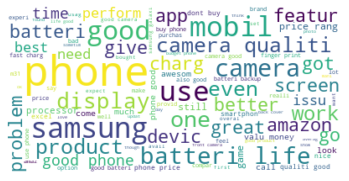

In [13]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(df['cleaned_reviews'].tolist()))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Analyzing the sentiment of reviews using the library 'vader'

In [14]:
# pip install vaderSentiment
analyser = SentimentIntensityAnalyzer()

In [15]:
#Defining a function to find the sentiment of a review. It will return a dictionary having positive, negative and compound scores.
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [16]:
#Defining a function to extract only the compound score.
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [17]:
df['sentiment_score']=df['reviews'].apply(lambda x:compound_score(x)) # applying on the reviews column to get the score

In [18]:
df.head(10)

,reviews,cleaned_reviews,sentiment_score
0,"Brought this phone for my wife who is die hard fan for oppo...Offer like 2000 extra off on exchange with Oppo is just like waww....So after exchange of her old oppo mobile I got this phone for just Rs.6800.... Best phone if u want oppo brand name and u are boared to ur old oppo phone... So this review is considering 6800 cost...Pros.1) good features considering cost 6800.2) Size matters 6.5 inch grt3) Speakers are good Dolby4) Comes with classic headphones with good looks and decent sound quality... No other phones now a days comes with headphones...5) Quad camera gives good quality photos...6) Selfie camera is also decent considering cost 68007) 5000mAh battery8) can be use as power bank for other phonesCons:1) Original cost 13990 is huge considering features...Other good brands like MI, VIVO, MOTO, etc sells 48MP camera phones for 12000 and so...2) Accessories like back cover, tempered glass are yet not in market... May be u have to wait for them...Though 1 transparent back cover is included in Mobile Box...This is all about this phone after 24hrs use....I will update if something comes...",brought phone wife die hard fan oppooff like 2000 extra exchang oppo like wawwso exchang old oppo mobil got phone rs6800 best phone u want oppo brand name u boar ur old oppo phone review consid 6800 costpros1 good featur consid cost 68002 size matter 65 inch grt3 speaker good dolby4 come classic headphon good look decent sound qualiti phone day come headphones5 quad camera give good qualiti photos6 selfi camera also decent consid cost 68007 5000mah battery8 use power bank phonescons1 origin cost 13990 huge consid featuresoth good brand like mi vivo moto etc sell 48mp camera phone 12000 so2 accessori like back cover temper glass yet market may u wait themthough 1 transpar back cover includ mobil boxthi phone 24hr usei updat someth come,0.9788
1,"Best option for exchange, I got it in 9k ,Review score (out of 5)Design : 4.5 (finger print scanner position is bit high), other things like screen size, corners,back panel, camera position are perfect and it's light weight too...Sounds quality : 5/5 (unexpected, dual side stereo and Dolby is awesome, loudness, clarity and effects are far better then any other phone i.e. mi 7 pro, Lenovo, Samsung or honor)Photography : it's similar to other available options in market, day light as usual is very clear and crisp, didn't get time for more night photography, but few repetitive uploaded pics are in night mode with very minimal light which are good.Battery backup : best in this category (10% ~ 3 hours of heavy uses) , for heavy uses 30hours for normal uses it ll go up to 2 days.Performance : not played many games but seems good, while opening any game auto memory cleaner will run,lag and heat issue is not there (checked continuously 1.5 hours)Memory space : 46 GB free space, all basic apps are pre installed, separate as card slot is available (apart from 2 SIM slot), 1.86 GB ram available after all updation, while playing any game also 900 to 1 GB space is availablePros : apart from above mentioned points :1)Front cam is good like other similar phone (mi, real me, honor, Samsung)2) earphones quality/look is very good in this range.3) dual speaker position is in front top of display and near to charging pin, so stereo comes properly4)face detection is fast5)no heating issue while charging /YouTube /gaming6) battery is lasting for more than 4 days on normal usesCons:1) fingerprint scanner position is bit high2) ram 6 GB would have a perfect option3) macro photos are not that good compare to redmi 7 pro4) no fast charger with pack",best option exchang got 9k review score 5design 45 finger print scanner posit bit high thing like screen size cornersback panel camera posit perfect light weight toosound qualiti 55 unexpect dual side stereo dolbi awesom loud clariti effect far better phone ie mi 7 pro lenovo samsung honorphotographi similar avail option market day lig

* We have got the sentiment score. Now categorizing the reviews based on the score into postive and negative using the below conditions.

In [19]:
def sentiment_category(score):
    if score >= 0:
        return "positive"
    elif score <= 0:
        return "negative"

In [20]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [21]:
df.head(15)

,reviews,cleaned_reviews,sentiment_score,review_category
0,"Brought this phone for my wife who is die hard fan for oppo...Offer like 2000 extra off on exchange with Oppo is just like waww....So after exchange of her old oppo mobile I got this phone for just Rs.6800.... Best phone if u want oppo brand name and u are boared to ur old oppo phone... So this review is considering 6800 cost...Pros.1) good features considering cost 6800.2) Size matters 6.5 inch grt3) Speakers are good Dolby4) Comes with classic headphones with good looks and decent sound quality... No other phones now a days comes with headphones...5) Quad camera gives good quality photos...6) Selfie camera is also decent considering cost 68007) 5000mAh battery8) can be use as power bank for other phonesCons:1) Original cost 13990 is huge considering features...Other good brands like MI, VIVO, MOTO, etc sells 48MP camera phones for 12000 and so...2) Accessories like back cover, tempered glass are yet not in market... May be u have to wait for them...Though 1 transparent back cover is included in Mobile Box...This is all about this phone after 24hrs use....I will update if something comes...",brought phone wife die hard fan oppooff like 2000 extra exchang oppo like wawwso exchang old oppo mobil got phone rs6800 best phone u want oppo brand name u boar ur old oppo phone review consid 6800 costpros1 good featur consid cost 68002 size matter 65 inch grt3 speaker good dolby4 come classic headphon good look decent sound qualiti phone day come headphones5 quad camera give good qualiti photos6 selfi camera also decent consid cost 68007 5000mah battery8 use power bank phonescons1 origin cost 13990 huge consid featuresoth good brand like mi vivo moto etc sell 48mp camera phone 12000 so2 accessori like back cover temper glass yet market may u wait themthough 1 transpar back cover includ mobil boxthi phone 24hr usei updat someth come,0.9788,positive
1,"Best option for exchange, I got it in 9k ,Review score (out of 5)Design : 4.5 (finger print scanner position is bit high), other things like screen size, corners,back panel, camera position are perfect and it's light weight too...Sounds quality : 5/5 (unexpected, dual side stereo and Dolby is awesome, loudness, clarity and effects are far better then any other phone i.e. mi 7 pro, Lenovo, Samsung or honor)Photography : it's similar to other available options in market, day light as usual is very clear and crisp, didn't get time for more night photography, but few repetitive uploaded pics are in night mode with very minimal light which are good.Battery backup : best in this category (10% ~ 3 hours of heavy uses) , for heavy uses 30hours for normal uses it ll go up to 2 days.Performance : not played many games but seems good, while opening any game auto memory cleaner will run,lag and heat issue is not there (checked continuously 1.5 hours)Memory space : 46 GB free space, all basic apps are pre installed, separate as card slot is available (apart from 2 SIM slot), 1.86 GB ram available after all updation, while playing any game also 900 to 1 GB space is availablePros : apart from above mentioned points :1)Front cam is good like other similar phone (mi, real me, honor, Samsung)2) earphones quality/look is very good in this range.3) dual speaker position is in front top of display and near to charging pin, so stereo comes properly4)face detection is fast5)no heating issue while charging /YouTube /gaming6) battery is lasting for more than 4 days on normal usesCons:1) fingerprint scanner position is bit high2) ram 6 GB would have a perfect option3) macro photos are not that good compare to redmi 7 pro4) no fast charger with pack",best option exchang got 9k review score 5design 45 finger print scanner posit bit high thing like screen size cornersback panel camera posit perfect light weight toosound qualiti 55 unexpect dual side stereo dolbi awesom loud clariti effect far better phone ie mi 7 pro lenovo samsung honorphotographi similar av

### Plotting a distribution of the review categories
 

Text(0.5, 1.0, 'Distribution of Reviews Category')

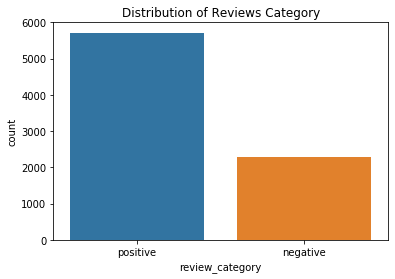

In [22]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

In [23]:
lb = LabelEncoder()
df["labels"] = lb.fit_transform(df["review_category"])
df.head()
# positive- 1, negative- 0

,reviews,cleaned_reviews,sentiment_score,review_category,labels
0,"Brought this phone for my wife who is die hard fan for oppo...Offer like 2000 extra off on exchange with Oppo is just like waww....So after exchange of her old oppo mobile I got this phone for just Rs.6800.... Best phone if u want oppo brand name and u are boared to ur old oppo phone... So this review is considering 6800 cost...Pros.1) good features considering cost 6800.2) Size matters 6.5 inch grt3) Speakers are good Dolby4) Comes with classic headphones with good looks and decent sound quality... No other phones now a days comes with headphones...5) Quad camera gives good quality photos...6) Selfie camera is also decent considering cost 68007) 5000mAh battery8) can be use as power bank for other phonesCons:1) Original cost 13990 is huge considering features...Other good brands like MI, VIVO, MOTO, etc sells 48MP camera phones for 12000 and so...2) Accessories like back cover, tempered glass are yet not in market... May be u have to wait for them...Though 1 transparent back cover is included in Mobile Box...This is all about this phone after 24hrs use....I will update if something comes...",brought phone wife die hard fan oppooff like 2000 extra exchang oppo like wawwso exchang old oppo mobil got phone rs6800 best phone u want oppo brand name u boar ur old oppo phone review consid 6800 costpros1 good featur consid cost 68002 size matter 65 inch grt3 speaker good dolby4 come classic headphon good look decent sound qualiti phone day come headphones5 quad camera give good qualiti photos6 selfi camera also decent consid cost 68007 5000mah battery8 use power bank phonescons1 origin cost 13990 huge consid featuresoth good brand like mi vivo moto etc sell 48mp camera phone 12000 so2 accessori like back cover temper glass yet market may u wait themthough 1 transpar back cover includ mobil boxthi phone 24hr usei updat someth come,0.9788,positive,1
1,"Best option for exchange, I got it in 9k ,Review score (out of 5)Design : 4.5 (finger print scanner position is bit high), other things like screen size, corners,back panel, camera position are perfect and it's light weight too...Sounds quality : 5/5 (unexpected, dual side stereo and Dolby is awesome, loudness, clarity and effects are far better then any other phone i.e. mi 7 pro, Lenovo, Samsung or honor)Photography : it's similar to other available options in market, day light as usual is very clear and crisp, didn't get time for more night photography, but few repetitive uploaded pics are in night mode with very minimal light which are good.Battery backup : best in this category (10% ~ 3 hours of heavy uses) , for heavy uses 30hours for normal uses it ll go up to 2 days.Performance : not played many games but seems good, while opening any game auto memory cleaner will run,lag and heat issue is not there (checked continuously 1.5 hours)Memory space : 46 GB free space, all basic apps are pre installed, separate as card slot is available (apart from 2 SIM slot), 1.86 GB ram available after all updation, while playing any game also 900 to 1 GB space is availablePros : apart from above mentioned points :1)Front cam is good like other similar phone (mi, real me, honor, Samsung)2) earphones quality/look is very good in this range.3) dual speaker position is in front top of display and near to charging pin, so stereo comes properly4)face detection is fast5)no heating issue while charging /YouTube /gaming6) battery is lasting for more than 4 days on normal usesCons:1) fingerprint scanner position is bit high2) ram 6 GB would have a perfect option3) macro photos are not that good compare to redmi 7 pro4) no fast charger with pack",best option exchang got 9k review score 5design 45 finger print scanner posit bit high thing like screen size cornersback panel camera posit perfect light weight toosound qualiti 55 unexpect dual side stereo dolbi awesom loud clariti effect far better phone ie mi 7 pro lenovo samsung honorphotographi s

In [24]:
positive_reviews=df.loc[df['review_category']=='positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

[' brought phone wife die hard fan oppooff like 2000 extra exchang oppo like wawwso exchang old oppo mobil got phone rs6800 best phone u want oppo brand name u boar ur old oppo phone review consid 6800 costpros1 good featur consid cost 68002 size matter 65 inch grt3 speaker good dolby4 come classic headphon good look decent sound qualiti phone day come headphones5 quad camera give good qualiti photos6 selfi camera also decent consid cost 68007 5000mah battery8 use power bank phonescons1 origin cost 13990 huge consid featuresoth good brand like mi vivo moto etc sell 48mp camera phone 12000 so2 accessori like back cover temper glass yet market may u wait themthough 1 transpar back cover includ mobil boxthi phone 24hr usei updat someth come',
 ' best option exchang got 9k review score 5design 45 finger print scanner posit bit high thing like screen size cornersback panel camera posit perfect light weight toosound qualiti 55 unexpect dual side stereo dolbi awesom loud clariti effect far be

In [25]:
negative_reviews=df.loc[df['review_category']=='negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

[' lowest speed ever seen android charger support batteri 3 hour take full charg',
 ' lowest speed ever seen android charger support batteri 3 hour take full charg',
 ' oppo a5 faulti product sell amazon shake hand agent fool customerth camera qualiti mobil worst regard 3rd day want return product amazon deni say fault product manufactur product manufactur product faulti shall take return product return money back amazon execut take request return product straight away fool custom amazon',
 ' mobil deliv 20july20 fingerprint scanner stop work 11aug20 ie less month ai within one month purchas scanner stop work anyon concern alreadi tri hard reset soft reset handset scanner never work see video attach moreov still instal bloatwar eg helo app seen screen shot ban indian govern small issu still work safeti indian custom thu never go recommend oppo mobil anyon even entri level forget highend seri',
 ' phone perfect nice got defect chargerkindli replac chargereven complaint say replacedbecau

### Generating wordclouds separately for positive and negative reviews

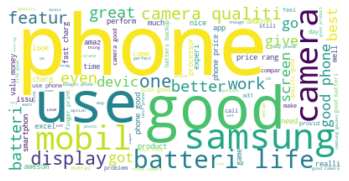

In [26]:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(' '.join(df.loc[df['review_category']=='positive','cleaned_reviews'].tolist()))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

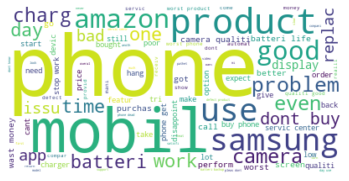

In [27]:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(' '.join(df.loc[df['review_category']=='negative','cleaned_reviews'].tolist()))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Exploratory Data Analysis

In [28]:
cra = df.copy() 

In [29]:
cra.head()

,reviews,cleaned_reviews,sentiment_score,review_category,labels
0,"Brought this phone for my wife who is die hard fan for oppo...Offer like 2000 extra off on exchange with Oppo is just like waww....So after exchange of her old oppo mobile I got this phone for just Rs.6800.... Best phone if u want oppo brand name and u are boared to ur old oppo phone... So this review is considering 6800 cost...Pros.1) good features considering cost 6800.2) Size matters 6.5 inch grt3) Speakers are good Dolby4) Comes with classic headphones with good looks and decent sound quality... No other phones now a days comes with headphones...5) Quad camera gives good quality photos...6) Selfie camera is also decent considering cost 68007) 5000mAh battery8) can be use as power bank for other phonesCons:1) Original cost 13990 is huge considering features...Other good brands like MI, VIVO, MOTO, etc sells 48MP camera phones for 12000 and so...2) Accessories like back cover, tempered glass are yet not in market... May be u have to wait for them...Though 1 transparent back cover is included in Mobile Box...This is all about this phone after 24hrs use....I will update if something comes...",brought phone wife die hard fan oppooff like 2000 extra exchang oppo like wawwso exchang old oppo mobil got phone rs6800 best phone u want oppo brand name u boar ur old oppo phone review consid 6800 costpros1 good featur consid cost 68002 size matter 65 inch grt3 speaker good dolby4 come classic headphon good look decent sound qualiti phone day come headphones5 quad camera give good qualiti photos6 selfi camera also decent consid cost 68007 5000mah battery8 use power bank phonescons1 origin cost 13990 huge consid featuresoth good brand like mi vivo moto etc sell 48mp camera phone 12000 so2 accessori like back cover temper glass yet market may u wait themthough 1 transpar back cover includ mobil boxthi phone 24hr usei updat someth come,0.9788,positive,1
1,"Best option for exchange, I got it in 9k ,Review score (out of 5)Design : 4.5 (finger print scanner position is bit high), other things like screen size, corners,back panel, camera position are perfect and it's light weight too...Sounds quality : 5/5 (unexpected, dual side stereo and Dolby is awesome, loudness, clarity and effects are far better then any other phone i.e. mi 7 pro, Lenovo, Samsung or honor)Photography : it's similar to other available options in market, day light as usual is very clear and crisp, didn't get time for more night photography, but few repetitive uploaded pics are in night mode with very minimal light which are good.Battery backup : best in this category (10% ~ 3 hours of heavy uses) , for heavy uses 30hours for normal uses it ll go up to 2 days.Performance : not played many games but seems good, while opening any game auto memory cleaner will run,lag and heat issue is not there (checked continuously 1.5 hours)Memory space : 46 GB free space, all basic apps are pre installed, separate as card slot is available (apart from 2 SIM slot), 1.86 GB ram available after all updation, while playing any game also 900 to 1 GB space is availablePros : apart from above mentioned points :1)Front cam is good like other similar phone (mi, real me, honor, Samsung)2) earphones quality/look is very good in this range.3) dual speaker position is in front top of display and near to charging pin, so stereo comes properly4)face detection is fast5)no heating issue while charging /YouTube /gaming6) battery is lasting for more than 4 days on normal usesCons:1) fingerprint scanner position is bit high2) ram 6 GB would have a perfect option3) macro photos are not that good compare to redmi 7 pro4) no fast charger with pack",best option exchang got 9k review score 5design 45 finger print scanner posit bit high thing like screen size cornersback panel camera posit perfect light weight toosound qualiti 55 unexpect dual side stereo dolbi awesom loud clariti effect far better phone ie mi 7 pro lenovo samsung honorphotographi s

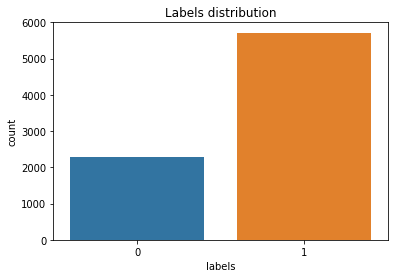

In [30]:
sns.countplot(cra['labels']);
plt.title('Labels distribution'); #Distribution after label encoding

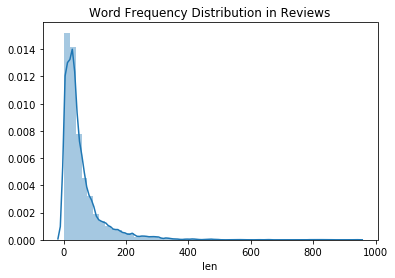

In [31]:
cra['len'] = cra['reviews'].apply(lambda x: len(x.split()))
plt.title("Word Frequency Distribution in Reviews")
sns.distplot(cra['len']); #number of words in reviews to check the distribution

In [32]:
cra.head(10)

,reviews,cleaned_reviews,sentiment_score,review_category,labels,len
0,"Brought this phone for my wife who is die hard fan for oppo...Offer like 2000 extra off on exchange with Oppo is just like waww....So after exchange of her old oppo mobile I got this phone for just Rs.6800.... Best phone if u want oppo brand name and u are boared to ur old oppo phone... So this review is considering 6800 cost...Pros.1) good features considering cost 6800.2) Size matters 6.5 inch grt3) Speakers are good Dolby4) Comes with classic headphones with good looks and decent sound quality... No other phones now a days comes with headphones...5) Quad camera gives good quality photos...6) Selfie camera is also decent considering cost 68007) 5000mAh battery8) can be use as power bank for other phonesCons:1) Original cost 13990 is huge considering features...Other good brands like MI, VIVO, MOTO, etc sells 48MP camera phones for 12000 and so...2) Accessories like back cover, tempered glass are yet not in market... May be u have to wait for them...Though 1 transparent back cover is included in Mobile Box...This is all about this phone after 24hrs use....I will update if something comes...",brought phone wife die hard fan oppooff like 2000 extra exchang oppo like wawwso exchang old oppo mobil got phone rs6800 best phone u want oppo brand name u boar ur old oppo phone review consid 6800 costpros1 good featur consid cost 68002 size matter 65 inch grt3 speaker good dolby4 come classic headphon good look decent sound qualiti phone day come headphones5 quad camera give good qualiti photos6 selfi camera also decent consid cost 68007 5000mah battery8 use power bank phonescons1 origin cost 13990 huge consid featuresoth good brand like mi vivo moto etc sell 48mp camera phone 12000 so2 accessori like back cover temper glass yet market may u wait themthough 1 transpar back cover includ mobil boxthi phone 24hr usei updat someth come,0.9788,positive,1,185
1,"Best option for exchange, I got it in 9k ,Review score (out of 5)Design : 4.5 (finger print scanner position is bit high), other things like screen size, corners,back panel, camera position are perfect and it's light weight too...Sounds quality : 5/5 (unexpected, dual side stereo and Dolby is awesome, loudness, clarity and effects are far better then any other phone i.e. mi 7 pro, Lenovo, Samsung or honor)Photography : it's similar to other available options in market, day light as usual is very clear and crisp, didn't get time for more night photography, but few repetitive uploaded pics are in night mode with very minimal light which are good.Battery backup : best in this category (10% ~ 3 hours of heavy uses) , for heavy uses 30hours for normal uses it ll go up to 2 days.Performance : not played many games but seems good, while opening any game auto memory cleaner will run,lag and heat issue is not there (checked continuously 1.5 hours)Memory space : 46 GB free space, all basic apps are pre installed, separate as card slot is available (apart from 2 SIM slot), 1.86 GB ram available after all updation, while playing any game also 900 to 1 GB space is availablePros : apart from above mentioned points :1)Front cam is good like other similar phone (mi, real me, honor, Samsung)2) earphones quality/look is very good in this range.3) dual speaker position is in front top of display and near to charging pin, so stereo comes properly4)face detection is fast5)no heating issue while charging /YouTube /gaming6) battery is lasting for more than 4 days on normal usesCons:1) fingerprint scanner position is bit high2) ram 6 GB would have a perfect option3) macro photos are not that good compare to redmi 7 pro4) no fast charger with pack",best option exchang got 9k review score 5design 45 finger print scanner posit bit high thing like screen size cornersback panel camera posit perfect light weight toosound qualiti 55 unexpect dual side stereo dolbi awesom loud clariti effect far better phone ie mi 7 pro lenovo samsung honorphoto

Negative mean length: 48.58
Positive mean length: 59.17
Mean Difference: 10.58


Text(0.5, 6.79999999999999, 'labels (0->negative, 1->positive)')

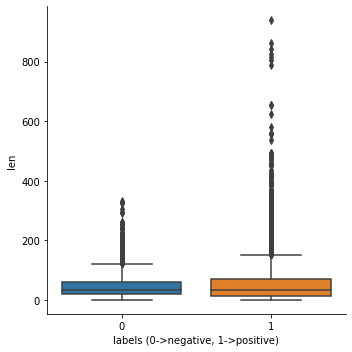

In [33]:
neg_mean_len = cra.groupby('labels')['len'].mean().values[0]
pos_mean_len = cra.groupby('labels')['len'].mean().values[1]

print(f"Negative mean length: {neg_mean_len:.2f}")
print(f"Positive mean length: {pos_mean_len:.2f}")
print(f"Mean Difference: {pos_mean_len-neg_mean_len:.2f}") #checking mean difference
ax = sns.catplot(x='labels', y='len', data=cra, kind='box')
plt.xlabel("labels (0->negative, 1->positive)") 

### Using Unigrams and Bigrams to check the sentiment

* Unigrams are just individual words
* Bigrams are a combination of 2 words

In [34]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [35]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)
top_20_positive_review_words

[('phone', 6881),
 ('', 6014),
 ('good', 4941),
 ('camera', 3006),
 ('batteri', 2745),
 ('use', 2357),
 ('samsung', 2226),
 ('qualiti', 1858),
 ('price', 1720),
 ('mobil', 1610),
 ('charg', 1453),
 ('day', 1447),
 ('like', 1293),
 ('also', 1287),
 ('one', 1254),
 ('product', 1215),
 ('display', 1119),
 ('best', 1117),
 ('time', 993),
 ('work', 989)]

In [36]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)
top_20_negative_review_words

[('', 2406),
 ('phone', 2241),
 ('product', 903),
 ('mobil', 813),
 ('amazon', 738),
 ('day', 682),
 ('qualiti', 668),
 ('good', 660),
 ('camera', 652),
 ('batteri', 649),
 ('use', 606),
 ('charg', 567),
 ('samsung', 565),
 ('return', 549),
 ('work', 547),
 ('buy', 495),
 ('replac', 483),
 ('dont', 480),
 ('problem', 476),
 ('get', 460)]

In [37]:
# Defining a function to produce a barplot of the most common words
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

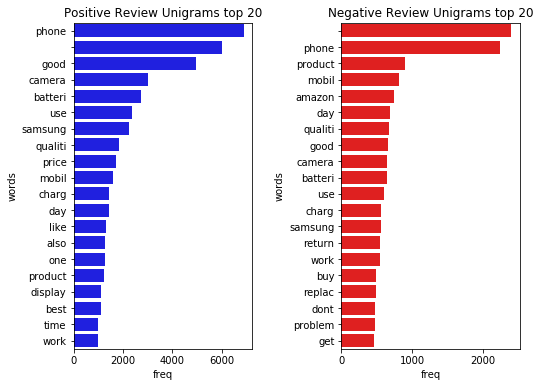

In [38]:
# Using the above function, to produce barplots for positive and negative reviews separately
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])
plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])

### Let's try it by using bigram

In [40]:
#Defining a function to create n-grams. It can be a combination of 2,3,4 or more words. This number can be given as an input to the function argument.
def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [41]:
# Creating bigrams for postive and negative reviews separately.
positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in negative_reviews]

In [42]:
positive_reviews_bigrams[:5]

['_brought brought_phone phone_wife wife_die die_hard hard_fan fan_oppooff oppooff_like like_2000 2000_extra extra_exchang exchang_oppo oppo_like like_wawwso wawwso_exchang exchang_old old_oppo oppo_mobil mobil_got got_phone phone_rs6800 rs6800_best best_phone phone_u u_want want_oppo oppo_brand brand_name name_u u_boar boar_ur ur_old old_oppo oppo_phone phone_review review_consid consid_6800 6800_costpros1 costpros1_good good_featur featur_consid consid_cost cost_68002 68002_size size_matter matter_65 65_inch inch_grt3 grt3_speaker speaker_good good_dolby4 dolby4_come come_classic classic_headphon headphon_good good_look look_decent decent_sound sound_qualiti qualiti_phone phone_day day_come come_headphones5 headphones5_quad quad_camera camera_give give_good good_qualiti qualiti_photos6 photos6_selfi selfi_camera camera_also also_decent decent_consid consid_cost cost_68007 68007_5000mah 5000mah_battery8 battery8_use use_power power_bank bank_phonescons1 phonescons1_origin origin_cost 

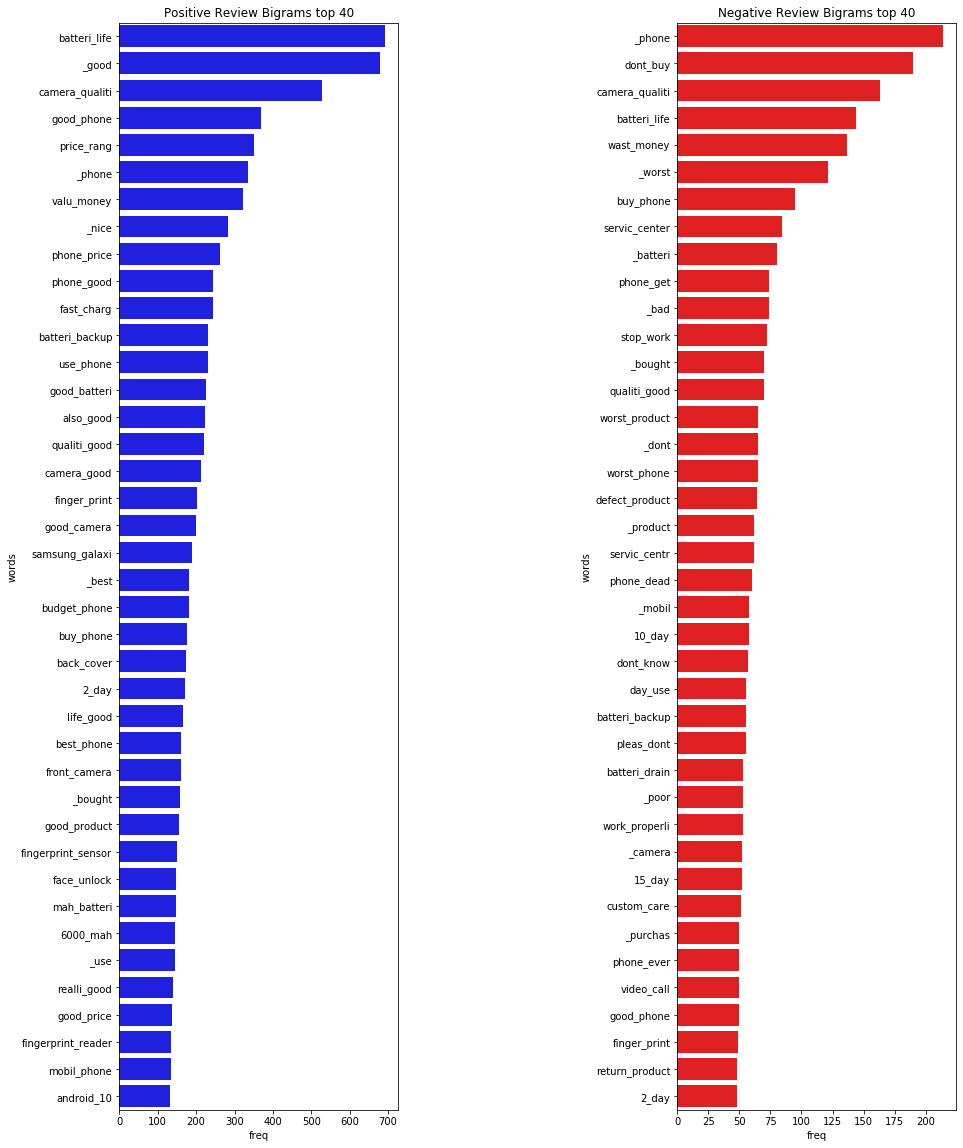

In [43]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,40,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])

##### From the above barplot, we can see that the most common bigrams in positive reviews are good_product, nice_watch, value_money, good_look, etc. The most common bigrams in negative reviews are warranty_card, stop_work, worst_product, dont_buy, poor_quality, etc

# Model building

In [44]:
md = df.copy()

In [45]:
md.columns

Index(['reviews', 'cleaned_reviews', 'sentiment_score', 'review_category',
       'labels'],
      dtype='object')

In [46]:
md = md.drop(["cleaned_reviews","sentiment_score", "review_category"], axis=1) #dropping the columns

In [47]:
md.head()

,reviews,labels
0,"Brought this phone for my wife who is die hard fan for oppo...Offer like 2000 extra off on exchange with Oppo is just like waww....So after exchange of her old oppo mobile I got this phone for just Rs.6800.... Best phone if u want oppo brand name and u are boared to ur old oppo phone... So this review is considering 6800 cost...Pros.1) good features considering cost 6800.2) Size matters 6.5 inch grt3) Speakers are good Dolby4) Comes with classic headphones with good looks and decent sound quality... No other phones now a days comes with headphones...5) Quad camera gives good quality photos...6) Selfie camera is also decent considering cost 68007) 5000mAh battery8) can be use as power bank for other phonesCons:1) Original cost 13990 is huge considering features...Other good brands like MI, VIVO, MOTO, etc sells 48MP camera phones for 12000 and so...2) Accessories like back cover, tempered glass are yet not in market... May be u have to wait for them...Though 1 transparent back cover is included in Mobile Box...This is all about this phone after 24hrs use....I will update if something comes...",1
1,"Best option for exchange, I got it in 9k ,Review score (out of 5)Design : 4.5 (finger print scanner position is bit high), other things like screen size, corners,back panel, camera position are perfect and it's light weight too...Sounds quality : 5/5 (unexpected, dual side stereo and Dolby is awesome, loudness, clarity and effects are far better then any other phone i.e. mi 7 pro, Lenovo, Samsung or honor)Photography : it's similar to other available options in market, day light as usual is very clear and crisp, didn't get time for more night photography, but few repetitive uploaded pics are in night mode with very minimal light which are good.Battery backup : best in this category (10% ~ 3 hours of heavy uses) , for heavy uses 30hours for normal uses it ll go up to 2 days.Performance : not played many games but seems good, while opening any game auto memory cleaner will run,lag and heat issue is not there (checked continuously 1.5 hours)Memory space : 46 GB free space, all basic apps are pre installed, separate as card slot is available (apart from 2 SIM slot), 1.86 GB ram available after all updation, while playing any game also 900 to 1 GB space is availablePros : apart from above mentioned points :1)Front cam is good like other similar phone (mi, real me, honor, Samsung)2) earphones quality/look is very good in this range.3) dual speaker position is in front top of display and near to charging pin, so stereo comes properly4)face detection is fast5)no heating issue while charging /YouTube /gaming6) battery is lasting for more than 4 days on normal usesCons:1) fingerprint scanner position is bit high2) ram 6 GB would have a perfect option3) macro photos are not that good compare to redmi 7 pro4) no fast charger with pack",1
2,Good Phone With Exchange,1
3,Oppo makes very nice phone at this price range about quad cameras but we have another option to select Realme smartphones which is comparatively low budget and good cameras...But this phone I like mostly in battery back up with type C charger.. and also like camera clearity because I have already attached some snaps here from my Oppo A5 2020...Overall good performance of this phone and speaker was nice sounds which is have dual atmos..Thanks Oppo,1
4,Lowest speed ever seen in android and charger not support to battery. It will be 3 hours to take full charge,0


In [48]:
md.shape #now the data contains only two columns

(8000, 2)

In [49]:
ps = PorterStemmer()
corpus = []

In [50]:
for i in range(0, len(md)):
    review = re.sub('[^a-zA-Z]', ' ', md['reviews'][i]) #substituting
    review = review.lower() # converting to lowercase
    review = review.split() #splitting
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #stemming
    review = ' '.join(review)
    corpus.append(review)

In [51]:
cv = CountVectorizer(max_features=8000)
X = cv.fit_transform(corpus).toarray()
y = md['labels']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting the data

In [53]:
#defining the function to fit X_train and X_test and to predict y_test followed by evaluation metrics
def prediction(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    conf = confusion_matrix(y_test, pred)
    joblib.dump(model, f"model_acc_{acc:.5f}.pkl")
    return model, acc, f1, conf

In [54]:
model = LogisticRegression(C=1, random_state=42, n_jobs=-1) #using logistic regression model
fit_model, acc, f1, conf = prediction(model, X_train, y_train, X_test, y_test)

In [55]:
print(f"Accuracy: {acc:.5f}")
print(f"F1_Score: {f1:.5f}")

Accuracy: 0.93688
F1_Score: 0.95715


In [56]:
print(conf)

[[ 371   64]
 [  37 1128]]


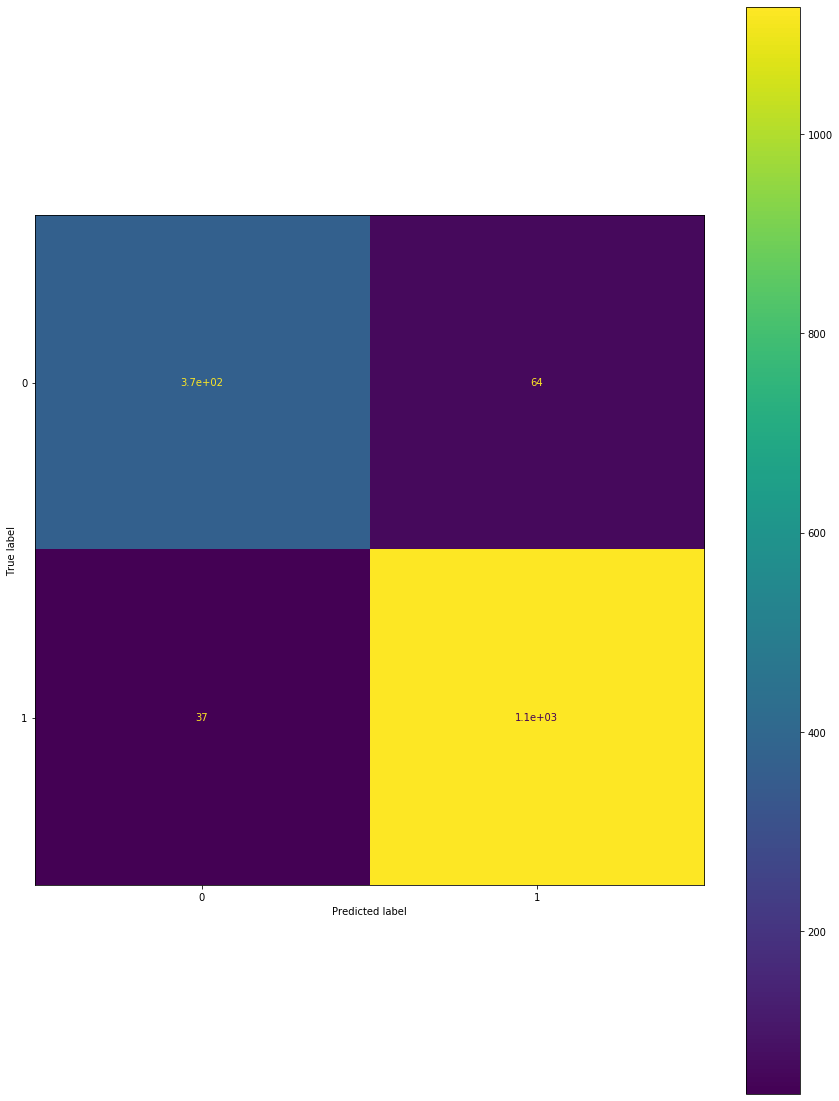

In [64]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [65]:
eli5.show_weights(estimator=fit_model, 
                  feature_names= list(cv.get_feature_names()),
                    top=(20,20))

Weight?,Feature
+2.091,nice
+1.801,love
+1.789,excel
+1.786,superb
+1.764,onveri
+1.455,awesom
+1.422,valu
+1.415,tell
+1.396,short
+1.394,mb
